# Test smoothing
This notebook is a test for different smoothing techniques which could be applied to trajectories, to later be used as training data for system identification.

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

Text(0, 0.5, 'state variable value')

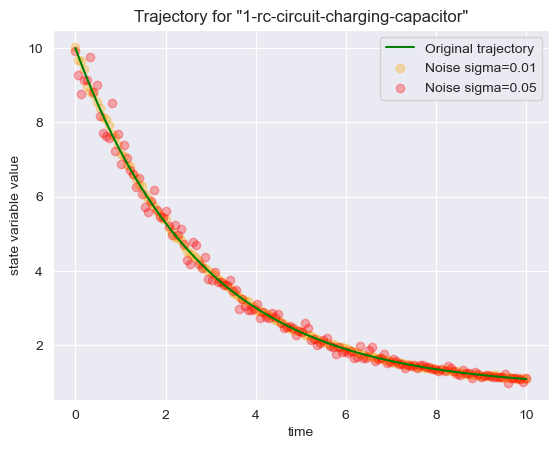

In [8]:
target_folder = "../local_results/check_odebench_all_transformations/1-rc-circuit-charging-capacitor"

# load regular trajectory data and noisy data
df_noiseless = pd.read_csv(os.path.join(target_folder, "trajectory-0-noise-0.00.csv"))
df_noise_001 = pd.read_csv(os.path.join(target_folder, "trajectory-0-noise-0.01.csv"))
df_noise_005 = pd.read_csv(os.path.join(target_folder, "trajectory-0-noise-0.05.csv"))

fig, ax = plt.subplots()
ax.plot(df_noiseless["t"].values, df_noiseless["x_0"].values, color='green', label="Original trajectory")
ax.scatter(df_noise_001["t"].values, df_noise_001["x_0"].values, color='orange', alpha=0.3, label="Noise sigma=0.01")
ax.scatter(df_noise_005["t"].values, df_noise_005["x_0"].values, color='red', alpha=0.3, label="Noise sigma=0.05")

ax.legend(loc='best')
ax.set_title("Trajectory for \"%s\"" % os.path.basename(target_folder))
ax.set_xlabel("time")
ax.set_ylabel("state variable value")

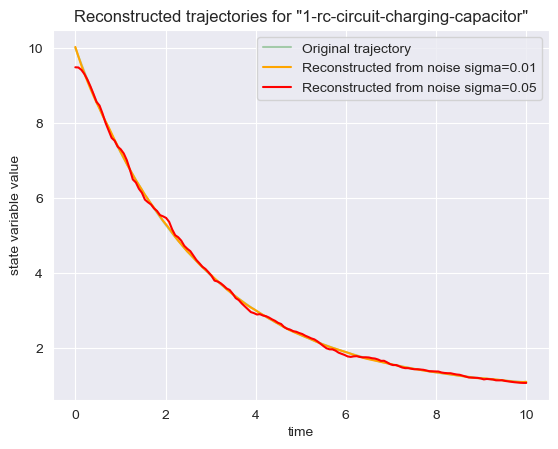

In [16]:
# let's go with our good old friend Savitzky-Golay
from scipy.signal import savgol_filter # used to smoothen data
smoothing_parameters = {'polyorder' : 3, 'axis' : 0, 'window_length' : 15}

x_smoothed_001 = savgol_filter(df_noise_001["x_0"].values, **smoothing_parameters)
x_smoothed_005 = savgol_filter(df_noise_005["x_0"].values, **smoothing_parameters)

fig, ax = plt.subplots()
ax.plot(df_noiseless["t"].values, df_noiseless["x_0"].values, alpha=0.3, color='green', label="Original trajectory")
ax.plot(df_noise_001["t"].values, x_smoothed_001, color='orange', alpha=1, label="Reconstructed from noise sigma=0.01")
ax.plot(df_noise_005["t"].values, x_smoothed_005, color='red', alpha=1, label="Reconstructed from noise sigma=0.05")

ax.set_xlabel("time")
ax.set_ylabel("state variable value")
ax.set_title("Reconstructed trajectories for \"%s\"" % os.path.basename(target_folder))
ax.legend(loc='best')